In [1]:
import numpy as np
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from astropy.io import fits

## Reading the data

In [2]:
file_name = 'acisf15258_000N021_r0031b_lc3.fits'
result = fits.open(file_name)
print(result.info())
resolution = result[1].header['TIMEDEL']
print(f'The time resolution is {resolution}s')

Filename: acisf15258_000N021_r0031b_lc3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU    164   3003R x 5C   [1D, 1D, 1D, 1D, 1D]   
  2  BKGLIGHTCURVE    1 BinTableHDU    169   3003R x 5C   [1D, 1D, 1D, 1D, 1D]   
None
The time resolution is 16.67995351553s


## Plotting the data 

(0.0, 0.0009)

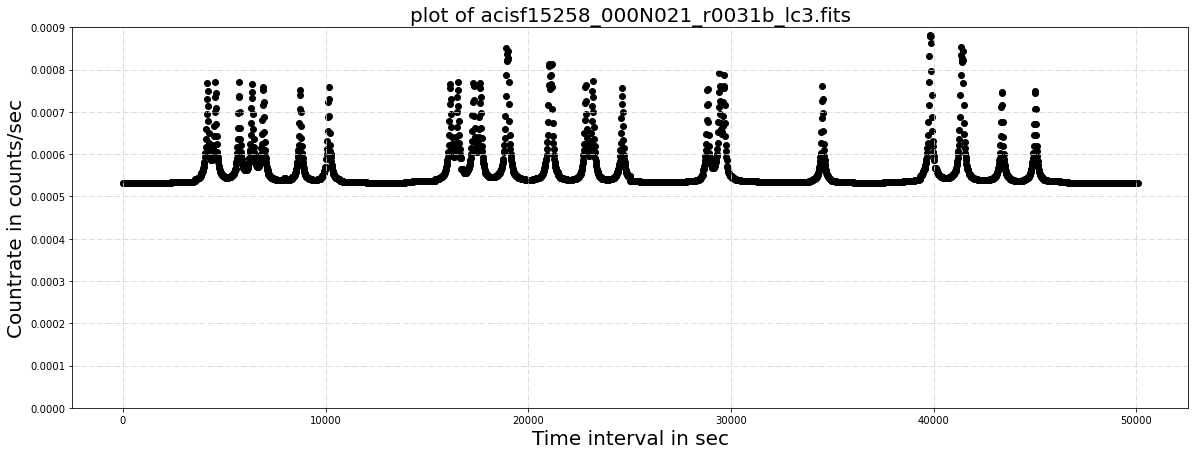

In [7]:

lc = result[1].data #Lightcurve
bg = result[2].data #Background

time = lc['Time']
lc_count_rate = lc['COUNT_RATE']
lc_count_rate_err = lc['COUNT_RATE_ERR']

#Starting time axis from zero
dt = time - time[0]

plt.figure(figsize = [20,7], facecolor = 'w')
plt.scatter(dt, lc_count_rate, c = 'k')
#plt.scatter(dt, lc_count_rate, c = 'k', zorder = 1)
#plt.errorbar(dt, lc_count_rate, lc_count_rate_err, fmt = 'none', c = 'pink', zorder = 0)
plt.grid(color = 'lightgrey', ls = '-.')
plt.xlabel('Time interval in sec', fontsize = 20)
plt.ylabel('Countrate in counts/sec', fontsize = 20)
plt.title(f'plot of {file_name}', fontsize = 20)
#plt.text(10000,2.8e-5, s = f'resolution = {resolution} s', fontsize = 20)
#plt.xlim(0,40000)
plt.ylim(0,0.0009)

## Fast Fourier Transform

Text(0, 0.5, 'log of Power')

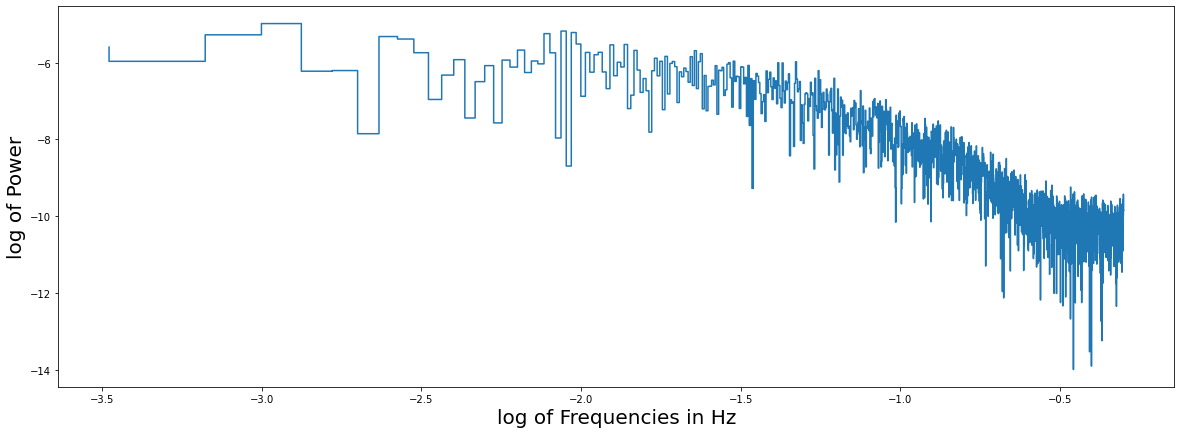

In [6]:
fft_val = abs(fft(lc_count_rate)) #raw abs output of the fft
freq = fftfreq(len(time)) #creating the necessary frequencies

mask = freq > 0 #masking for taking only positive half

power = 2*(fft_val**2)*resolution/len(time) #scaling the raw values (factor of 2 is used because we are taking only positve half of the freq)

#positive frequencies and corresponding power
freq_pos = freq[mask]
power_pos = power[mask]

#for PSD
#power 

plt.figure(figsize = [20,7], facecolor = 'w')
plt.step(np.log10(freq[mask]), np.log10(power[mask]))
#plt.xlim(0,0.075)
plt.xlabel('log of Frequencies in Hz', fontsize = 20)
plt.ylabel('log of Power', fontsize = 20)